In [29]:
# import lib 
import pandas as pd
import io
import requests
import numpy as np
import matplotlib.pyplot as plt
from   sklearn.decomposition import PCA
import seaborn as sns

In [39]:
# read data from url
iris_data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data',header=None)

In [55]:
# view the data in numpy
iris_data_np = np.asarray(iris_data)[:,2:4].astype(np.float32)
print(iris_data_np[:10,:])

[[1.4 0.2]
 [1.4 0.2]
 [1.3 0.2]
 [1.5 0.2]
 [1.4 0.2]
 [1.7 0.4]
 [1.4 0.3]
 [1.5 0.2]
 [1.4 0.2]
 [1.5 0.1]]


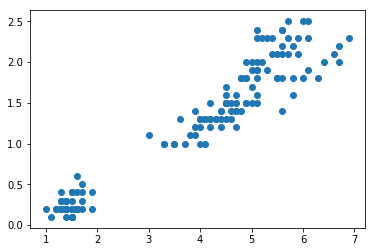

In [56]:
# view original data
plt.scatter(iris_data_np[:,0],iris_data_np[:,1]); plt.show()

(2, 2)


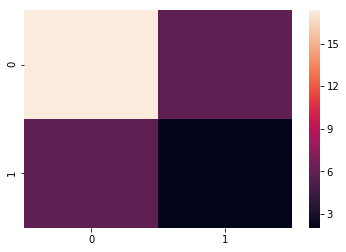

Projection Vector : 
 [[ 0.3198536  -0.94746697]
 [-0.94746697 -0.3198536 ]]


In [73]:
# get the cov and perform pca
my_cov = iris_data_np.T @ iris_data_np /(iris_data_np.shape[0]-1)
eigvalue,eigvector = np.linalg.eigh(my_cov)
sorted_index       = np.argsort(eigvalue)
projection_vector  = eigvector[:,sorted_index]
projected_data     = iris_data_np   @ projection_vector
recovered_data     = projected_data @ np.linalg.inv(projection_vector)
print(projection_vector.shape); sns.heatmap(my_cov); plt.show()
print('Projection Vector : \n',projection_vector)

[[ 0.3198536  -0.94746697]
 [-0.94746697 -0.3198536 ]]


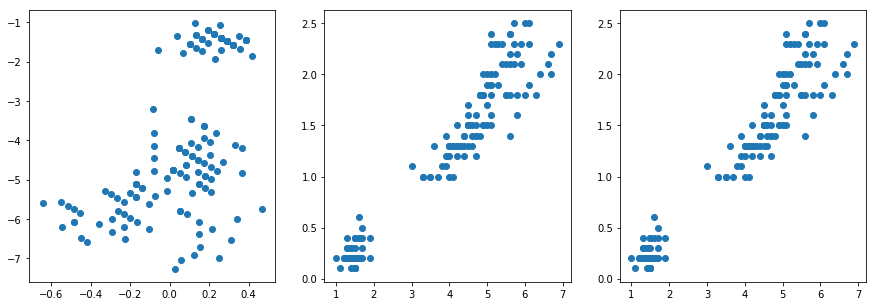

In [117]:
# view original data
print(projection_vector)
plt.figure(figsize=(15,5))
plt.subplot(131); plt.scatter(projected_data[:,0],projected_data[:,1]); 
plt.subplot(132); plt.scatter(recovered_data[:,0],recovered_data[:,1]);
plt.subplot(133); plt.scatter(iris_data_np[:,0],iris_data_np[:,1]); 
plt.show()

[ 0.06004034 19.304392  ]
[[ 0.3198536  -0.94746697]
 [-0.94746697 -0.3198536 ]]
[[ 0.         -0.94746697]
 [ 0.         -0.3198536 ]]


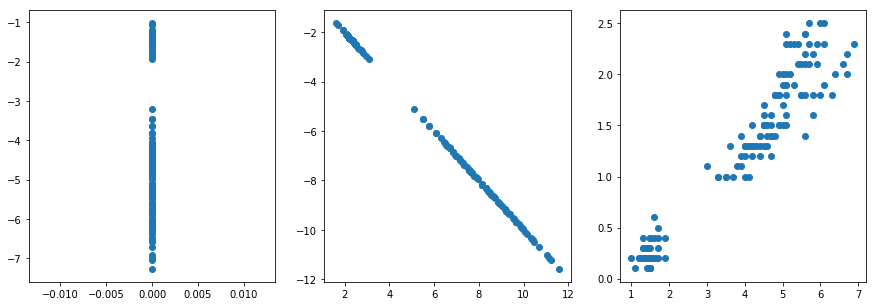

In [122]:
print(eigvalue[sorted_index]);print(eigvector)
reducing_projection_mat = projection_vector[:,-1:] 
added_mat = np.zeros((2,1))
reducing_projection_mat = np.hstack((added_mat,reducing_projection_mat))
reduced_data      = iris_data_np   @ reducing_projection_mat
reconstructed_data= reduced_data   @ np.linalg.inv(reducing_projection_mat+1e-8)
print(reducing_projection_mat)
plt.figure(figsize=(15,5))
plt.subplot(131); plt.scatter(reduced_data      [:,0],reduced_data      [:,1]); 
plt.subplot(132); plt.scatter(reconstructed_data[:,0],reconstructed_data[:,1]);
plt.subplot(133); plt.scatter(iris_data_np      [:,0],iris_data_np      [:,1]); 
plt.show()

[ 0.06004034 19.304392  ]
[[ 0.3198536  -0.94746697]
 [-0.94746697 -0.3198536 ]]
[[0.]
 [1.]]
[[0. 0.]
 [0. 1.]]


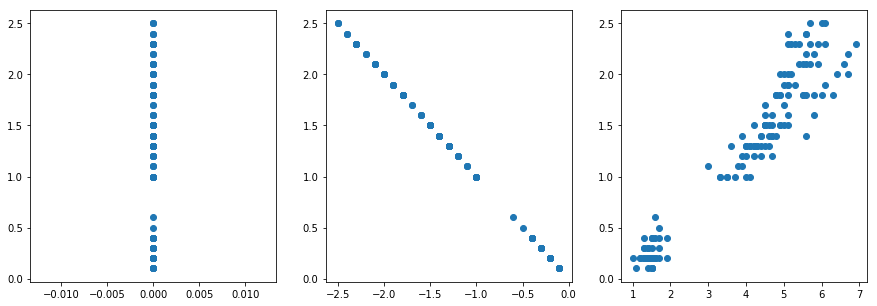

In [125]:
print(eigvalue[sorted_index]);print(eigvector)
reducing_projection_mat = projection_vector[:,-1:] 
reducing_projection_mat = (reducing_projection_mat-reducing_projection_mat.min())/(reducing_projection_mat.max()-reducing_projection_mat.min())
print(reducing_projection_mat)
added_mat = np.zeros((2,1))
reducing_projection_mat = np.hstack((added_mat,reducing_projection_mat))
reduced_data      = iris_data_np   @ reducing_projection_mat
reconstructed_data= reduced_data   @ np.linalg.inv(reducing_projection_mat+1e-8)
print(reducing_projection_mat)
plt.figure(figsize=(15,5))
plt.subplot(131); plt.scatter(reduced_data      [:,0],reduced_data      [:,1]); 
plt.subplot(132); plt.scatter(reconstructed_data[:,0],reconstructed_data[:,1]);
plt.subplot(133); plt.scatter(iris_data_np      [:,0],iris_data_np      [:,1]); 
plt.show()

[ 0.06004034 19.304392  ]
[[ 0.3198536  -0.94746697]
 [-0.94746697 -0.3198536 ]]
[[0.94746697]
 [0.3198536 ]]
[[0.         0.94746697]
 [0.         0.3198536 ]]


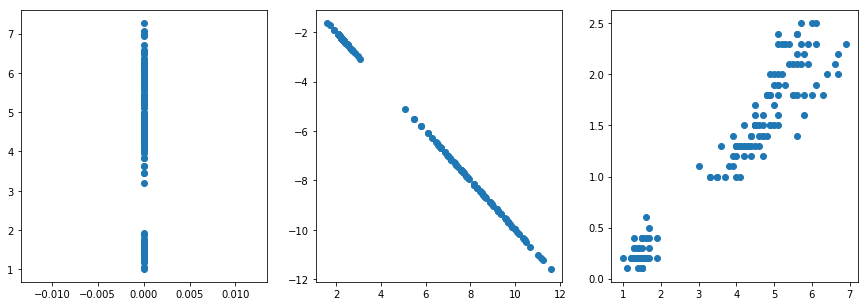

In [126]:
print(eigvalue[sorted_index]);print(eigvector)
reducing_projection_mat = projection_vector[:,-1:] 
reducing_projection_mat = np.sqrt(reducing_projection_mat**2)
print(reducing_projection_mat)
added_mat = np.zeros((2,1))
reducing_projection_mat = np.hstack((added_mat,reducing_projection_mat))
reduced_data      = iris_data_np   @ reducing_projection_mat
reconstructed_data= reduced_data   @ np.linalg.inv(reducing_projection_mat+1e-8)
print(reducing_projection_mat)
plt.figure(figsize=(15,5))
plt.subplot(131); plt.scatter(reduced_data      [:,0],reduced_data      [:,1]); 
plt.subplot(132); plt.scatter(reconstructed_data[:,0],reconstructed_data[:,1]);
plt.subplot(133); plt.scatter(iris_data_np      [:,0],iris_data_np      [:,1]); 
plt.show()

[ 0.06004034 19.304392  ]
[[ 0.3198536  -0.94746697]
 [-0.94746697 -0.3198536 ]]
[[-0.947467  ]
 [-0.31985363]]
[[ 0.         -0.94746703]
 [ 0.         -0.31985363]]


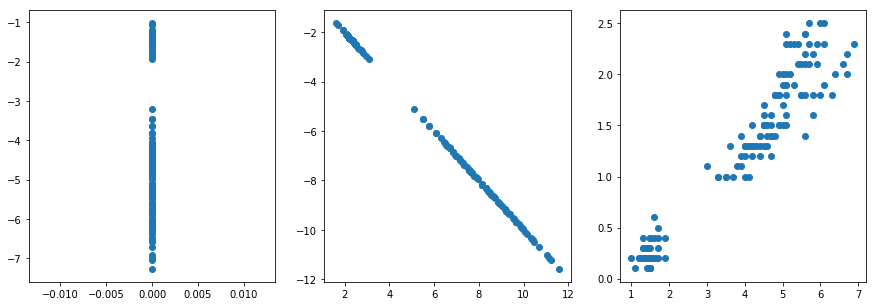

In [128]:
print(eigvalue[sorted_index]);print(eigvector)
reducing_projection_mat = projection_vector[:,-1:] 
reducing_projection_mat = reducing_projection_mat/np.linalg.norm(reducing_projection_mat)
print(reducing_projection_mat)
added_mat = np.zeros((2,1))
reducing_projection_mat = np.hstack((added_mat,reducing_projection_mat))
reduced_data      = iris_data_np   @ reducing_projection_mat
reconstructed_data= reduced_data   @ np.linalg.inv(reducing_projection_mat+1e-8)
print(reducing_projection_mat)
plt.figure(figsize=(15,5))
plt.subplot(131); plt.scatter(reduced_data      [:,0],reduced_data      [:,1]); 
plt.subplot(132); plt.scatter(reconstructed_data[:,0],reconstructed_data[:,1]);
plt.subplot(133); plt.scatter(iris_data_np      [:,0],iris_data_np      [:,1]); 
plt.show()

[[ 0.3198536  -0.94746697]
 [-0.94746697 -0.3198536 ]]
[[0.3198536  0.94746697]
 [0.94746697 0.3198536 ]]
[[-0.40213564  1.191202  ]
 [ 1.191202   -0.40213564]]


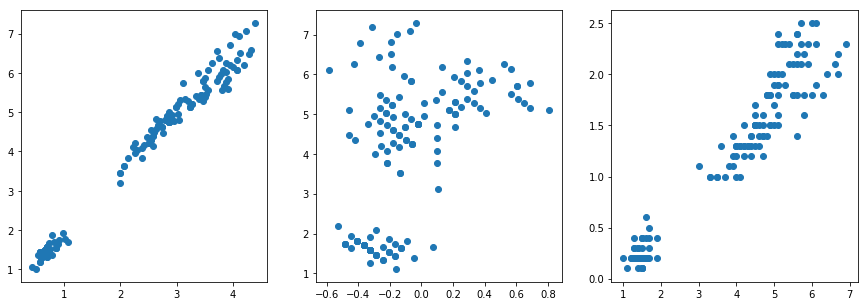

In [149]:
reducing_projection_mat = projection_vector                      ;print(reducing_projection_mat)

reducing_projection_mat = np.sqrt(reducing_projection_mat**2)   ;print(reducing_projection_mat)

back_og_data_space = np.linalg.inv(reducing_projection_mat)     ;print(back_og_data_space)



reduced_data      = iris_data_np   @ reducing_projection_mat
reconstructed_data= iris_data_np   @ back_og_data_space

plt.figure(figsize=(15,5))
plt.subplot(131); plt.scatter(reduced_data      [:,0],reduced_data      [:,1]); 
plt.subplot(132); plt.scatter(reconstructed_data[:,0],reconstructed_data[:,1]);
plt.subplot(133); plt.scatter(iris_data_np      [:,0],iris_data_np      [:,1]); 
plt.show()

[[ 0.3198536  -0.94746697]
 [-0.94746697 -0.3198536 ]]
[[1. 0.]
 [0. 1.]]
[[1. 0.]
 [0. 1.]]


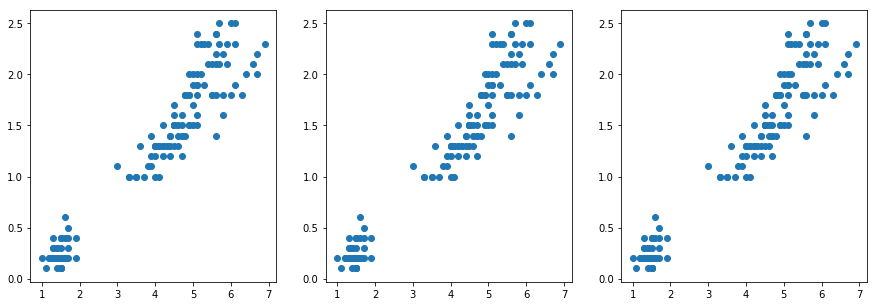

In [157]:
reducing_projection_mat = projection_vector                      ;print(reducing_projection_mat)

reducing_projection_mat = (reducing_projection_mat-reducing_projection_mat.min(1))/(reducing_projection_mat.max(1)-reducing_projection_mat.min(1))
print(reducing_projection_mat)

back_og_data_space = np.linalg.inv(reducing_projection_mat)     ;print(back_og_data_space)



reduced_data      = iris_data_np   @ reducing_projection_mat
reconstructed_data= iris_data_np   @ back_og_data_space

plt.figure(figsize=(15,5))
plt.subplot(131); plt.scatter(reduced_data      [:,0],reduced_data      [:,1]); 
plt.subplot(132); plt.scatter(reconstructed_data[:,0],reconstructed_data[:,1]);
plt.subplot(133); plt.scatter(iris_data_np      [:,0],iris_data_np      [:,1]); 
plt.show()

[[ 0.3198536  -0.94746697]
 [-0.94746697 -0.3198536 ]]
[[ 1.        -0.9999999]
 [-1.         1.0000001]]
[[4194304.5 4194303.5]
 [4194304.  4194304. ]]


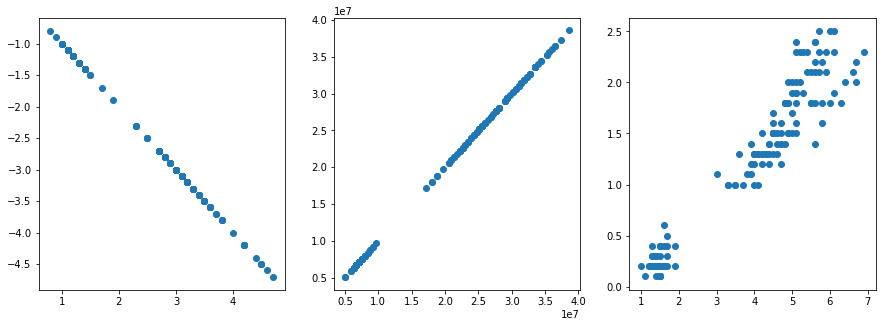

In [158]:
reducing_projection_mat = projection_vector                      ;print(reducing_projection_mat)

reducing_projection_mat = (reducing_projection_mat-reducing_projection_mat.mean(1))/(reducing_projection_mat.std(1))
print(reducing_projection_mat)

back_og_data_space = np.linalg.inv(reducing_projection_mat)     ;print(back_og_data_space)


reduced_data      = iris_data_np   @ reducing_projection_mat
reconstructed_data= iris_data_np   @ back_og_data_space

plt.figure(figsize=(15,5))
plt.subplot(131); plt.scatter(reduced_data      [:,0],reduced_data      [:,1]); 
plt.subplot(132); plt.scatter(reconstructed_data[:,0],reconstructed_data[:,1]);
plt.subplot(133); plt.scatter(iris_data_np      [:,0],iris_data_np      [:,1]); 
plt.show()

[[ 0.3198536  -0.94746697]
 [-0.94746697 -0.3198536 ]]
[[ 0.6336603  -0.31380665]
 [-0.6336603   0.3138067 ]]
[[ 8308557.   8308555.5]
 [16777216.  16777216. ]]


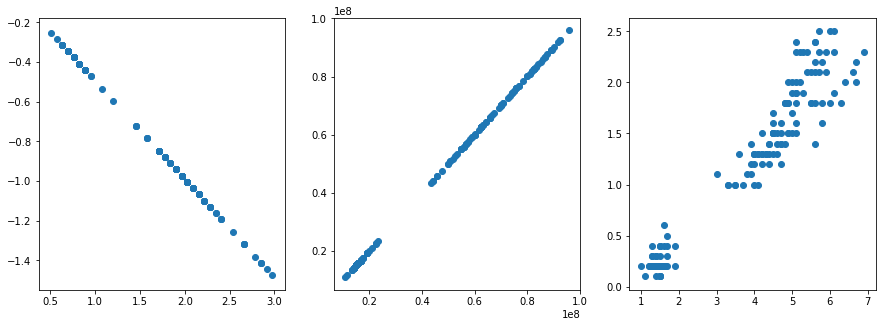

In [159]:
reducing_projection_mat = projection_vector                      ;print(reducing_projection_mat)

reducing_projection_mat = (reducing_projection_mat-reducing_projection_mat.mean(1))
print(reducing_projection_mat)

back_og_data_space = np.linalg.inv(reducing_projection_mat)     ;print(back_og_data_space)


reduced_data      = iris_data_np   @ reducing_projection_mat
reconstructed_data= iris_data_np   @ back_og_data_space

plt.figure(figsize=(15,5))
plt.subplot(131); plt.scatter(reduced_data      [:,0],reduced_data      [:,1]); 
plt.subplot(132); plt.scatter(reconstructed_data[:,0],reconstructed_data[:,1]);
plt.subplot(133); plt.scatter(iris_data_np      [:,0],iris_data_np      [:,1]); 
plt.show()

# Reference
1. https://stackoverflow.com/questions/21030391/how-to-normalize-an-array-in-numpy

In [160]:
! git add .
! git commit -m 'from mac'
! git push

[master 7763aa52] from mac
 1 file changed, 268 insertions(+), 9 deletions(-)
Counting objects: 5, done.
Delta compression using up to 4 threads.
Compressing objects: 100% (5/5), done.
Writing objects: 100% (5/5), 129.16 KiB | 12.92 MiB/s, done.
Total 5 (delta 2), reused 0 (delta 0)
remote: Resolving deltas: 100% (2/2), completed with 2 local objects.
To https://github.com/JaeDukSeo/Daily-Neural-Network-Practice-2
   a5dc652f..7763aa52  master -> master
